# Realtime Alignment

Let say you want to align realtime recording / input, malaya-speech able to do that.

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/realtime-alignment](https://github.com/huseinzol05/malaya-speech/tree/master/example/realtime-alignment).
    
</div>

<div class="alert alert-warning">

This module is not language independent, so it not save to use on different languages. Pretrained models trained on hyperlocal languages.
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

In [1]:
import malaya_speech
from malaya_speech import Pipeline
from malaya_speech.utils.astype import float_to_int

Cannot import beam_search_ops from Tensorflow Addons, ['malaya.jawi_rumi.deep_model', 'malaya.phoneme.deep_model', 'malaya.rumi_jawi.deep_model', 'malaya.stem.deep_model'] will not available to use, make sure Tensorflow Addons version >= 0.12.0
check compatible Tensorflow version with Tensorflow Addons at https://github.com/tensorflow/addons/releases
/Users/huseinzolkepli/.pyenv/versions/3.9.4/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
torchaudio.io.StreamReader exception: FFmpeg libraries are not found. Please install FFmpeg.
`torchaudio.io.StreamReader` is not available, `malaya_speech.streaming.torchaudio.stream` is not able to use.
`openai-whisper` is not available, native whisper processor is not available, will use huggingface processor instead.
`torchaudio.io.StreamReader` is not available, `

### Load VAD model

We are going to use WebRTC VAD model, read more about VAD at https://malaya-speech.readthedocs.io/en/latest/load-vad.html

In [2]:
vad_model = malaya_speech.vad.webrtc()

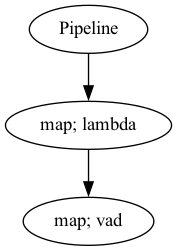

In [3]:
p_vad = Pipeline()
pipeline = (
    p_vad.map(lambda x: float_to_int(x, divide_max_abs=False))
    .map(vad_model)
)
p_vad.visualize()

Starting malaya-speech 1.4.0, streaming always returned a float32 array between -1 and +1 values.

### Streaming interface

```python
def stream(
    vad_model=None,
    asr_model=None,
    classification_model=None,
    sample_rate: int = 16000,
    segment_length: int = 2560,
    num_padding_frames: int = 20,
    ratio: float = 0.75,
    min_length: float = 0.1,
    max_length: float = 10.0,
    realtime_print: bool = True,
    **kwargs,
):
    """
    Stream an audio using pyaudio library.

    Parameters
    ----------
    vad_model: object, optional (default=None)
        vad model / pipeline.
    asr_model: object, optional (default=None)
        ASR model / pipeline, will transcribe each subsamples realtime.
    classification_model: object, optional (default=None)
        classification pipeline, will classify each subsamples realtime.
    device: None, optional (default=None)
        `device` parameter for pyaudio, check available devices from `sounddevice.query_devices()`.
    sample_rate: int, optional (default = 16000)
        output sample rate.
    segment_length: int, optional (default=2560)
        usually derived from asr_model.segment_length * asr_model.hop_length,
        size of audio chunks, actual size in term of second is `segment_length` / `sample_rate`.
    ratio: float, optional (default = 0.75)
        if 75% of the queue is positive, assumed it is a voice activity.
    min_length: float, optional (default=0.1)
        minimum length (second) to accept a subsample.
    max_length: float, optional (default=10.0)
        maximum length (second) to accept a subsample.
    realtime_print: bool, optional (default=True)
        Will print results for ASR.
    **kwargs: vector argument
        vector argument pass to malaya_speech.streaming.pyaudio.Audio interface.

    Returns
    -------
    result : List[dict]
    """
```

### Check available devices

In [4]:
import sounddevice

sounddevice.query_devices()

> 0 MacBook Air Microphone, Core Audio (1 in, 0 out)
< 1 MacBook Air Speakers, Core Audio (0 in, 2 out)

By default it will use `0` index.

### Load ASR model

In [5]:
model = malaya_speech.stt.transducer.transformer(model = 'conformer')

### Force Alignment Pipeline

Feel free to add speech enhancement or any function, but in this example, I just keep it simple.

Right now only transducer Tensorflow model supported `force_alignment` method.

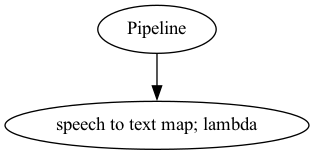

In [6]:
p_asr = Pipeline()
pipeline_asr = (
    p_asr.map(lambda x: model.predict_alignment(x), name = 'speech-to-text')
)
p_asr.visualize()

**You need to make sure the last output should named as `speech-to-text` or else the realtime engine will throw an error**.

### Start Recording

**Again, once you start to run the code below, it will straight away recording your voice**. 

If you run in jupyter notebook, press button stop up there to stop recording, if in terminal, press `CTRL + c`.

In [9]:
samples = malaya_speech.streaming.pyaudio.stream(vad_model = p_vad, asr_model = p_asr,
                                                segment_length = 320)

[{'text': 'helo', 'start': 0.040000003, 'end': 0.1300000047683716}] [{'text': 'nama', 'start': 0.080000006, 'end': 0.21000000298023225}, {'text': 'saya', 'start': 0.28, 'end': 0.49000001907348634}] [] [{'text': 'hari', 'start': 0.040000003, 'end': 0.2500000095367432}, {'text': 'ini', 'start': 0.28, 'end': 0.2900000011920929}, {'text': 'saya', 'start': 0.52000004, 'end': 0.65000004529953}, {'text': 'nak', 'start': 0.76000005, 'end': 0.7700000500679016}, {'text': 'cakap', 'start': 1.0, 'end': 1.2100000476837158}, {'text': 'tentang', 'start': 1.24, 'end': 1.610000023841858}] [{'text': 'ini', 'start': 0.080000006, 'end': 0.09000000566244125}, {'text': 'saya', 'start': 0.32000002, 'end': 0.5700000023841858}] [{'text': 'saya', 'start': 0.24000001, 'end': 0.37000001430511475}, {'text': 'macam', 'start': 0.44000003, 'end': 0.65000004529953}, {'text': 'tu', 'start': 1.08, 'end': 1.0900000429153442}] [{'text': 'dan', 'start': 0.120000005, 'end': 0.1300000047683716}, {'text': 'saya', 'start': 0.4

Actually it is pretty nice. As you can see, it able to transcribe realtime, you can try it by yourself.

In [10]:
import IPython.display as ipd
import numpy as np

In [13]:
samples[-2]

{'wav_data': array([-0.00130833, -0.00126185, -0.00101168, ...,  0.00048238,
         0.00061575,  0.00031507], dtype=float32),
 'timestamp': datetime.datetime(2023, 2, 17, 1, 42, 21, 411091),
 'asr_model': [{'text': 'dan',
   'start': 0.120000005,
   'end': 0.1300000047683716},
  {'text': 'saya', 'start': 0.4, 'end': 0.49000001907348634},
  {'text': 'tak', 'start': 0.56, 'end': 0.5700000023841858},
  {'text': 'suka', 'start': 0.76000005, 'end': 0.9300000166893005},
  {'text': 'mandi', 'start': 1.0, 'end': 1.1700000858306885}]}

In [14]:
ipd.Audio(samples[-2]['wav_data'], rate = 16000)